In [1]:
from PIL import Image
import hdbscan
import time
import seaborn as sns
import pickle
import numpy as np
import pandas as pd
from umap import UMAP
from image_helpers import *
from tsne import image_scatter_plot
from sklearn.linear_model import LogisticRegression


import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
sns.set_context("poster")
%pylab inline

import warnings
warnings.filterwarnings('ignore')
pylab.rcParams['figure.figsize'] = (15, 15)

Populating the interactive namespace from numpy and matplotlib


In [2]:
!ls ../data/*.pickle

../data/AF_ALL_faces_encodings.pickle
../data/AM_ALL_faces_encodings.pickle
../data/CF_ALL_encodings.pickle
../data/CF_ALL_faces_encodings.pickle
../data/CM_ALL_faces_encodings.pickle
../data/encodings.pickle
../data/encodings_likes.pickle
../data/friends.pickle
../data/friends_and_myself_pics_faces_encodings.pickle
../data/friends_pics_male_faces_encodings.pickle
../data/test_encodings.pickle
../data/tinder_pics_2017_deduped_firsts_faces_encodings.pickle
../data/tinder_pics_dislikes_faces_firsts_deduped_encodings.pickle
../data/tinder_pics_likes_faces_deduped_firsts_encodings.pickle


In [3]:
data, paths, encodings, arrays_rescaled, X = load_encodings('../data/../data/CF_ALL_faces_encodings.pickle')
paths, encodings, arrays_rescaled, X = append_new_dataset(paths, encodings, arrays_rescaled, X,'../data/tinder_pics_likes_faces_deduped_firsts_encodings.pickle')
num_of_likes = len(paths) - len(data)
paths, encodings, arrays_rescaled, X = append_new_dataset(paths, encodings, arrays_rescaled, X,'../data/tinder_pics_2017_deduped_firsts_faces_encodings.pickle')
num_of_friends = len(paths) - len(data) - num_of_likes

846 846 846 846
1097 1097 1097 1097


In [ ]:
len(data)

In [4]:
df = pd.DataFrame().from_csv(
        '../data/filename_to_rating_lookup_ALL.csv', 
        index_col=[0]
    ) 
    
look_up_file_to_attractiveness_rating = dict(zip(df['Filename'], df['Rating']))
paths = [file_path.replace('_face', '').split('/')[-1] for file_path in paths]
colors_dic = [look_up_file_to_attractiveness_rating.get(just_file_name) for just_file_name in paths]
pd.Series(colors_dic).value_counts()

colors_pal = sns.color_palette('deep', 5)

attractiveness_colors_lis=[]
for color_number in colors_dic:
    if not color_number:
        #friends are blue
        attractiveness_colors_lis.append((0,0,255))
    else:
        attractiveness_colors_lis.append(colors_pal[color_number - 1])

pd.Series(attractiveness_colors_lis).value_counts()

(0, 0, 255)                                                      356
(0.7686274509803922, 0.3058823529411765, 0.3215686274509804)     343
(0.5058823529411764, 0.4470588235294118, 0.6980392156862745)     174
(0.8, 0.7254901960784313, 0.4549019607843137)                    121
(0.3333333333333333, 0.6588235294117647, 0.40784313725490196)     91
(0.2980392156862745, 0.4470588235294118, 0.6901960784313725)      12
dtype: int64

In [12]:
params = {
    #5 to 50, with a choice of 10 to 15 being a sensible default.
    "n_neighbors":50,

    #0.001 to 0.5, with 0.1 being a reasonable default.
    "min_dist":0.5,

    #metric: This determines the choice of metric used to measure distance in the input space. 
    "metric":'euclidean'
}



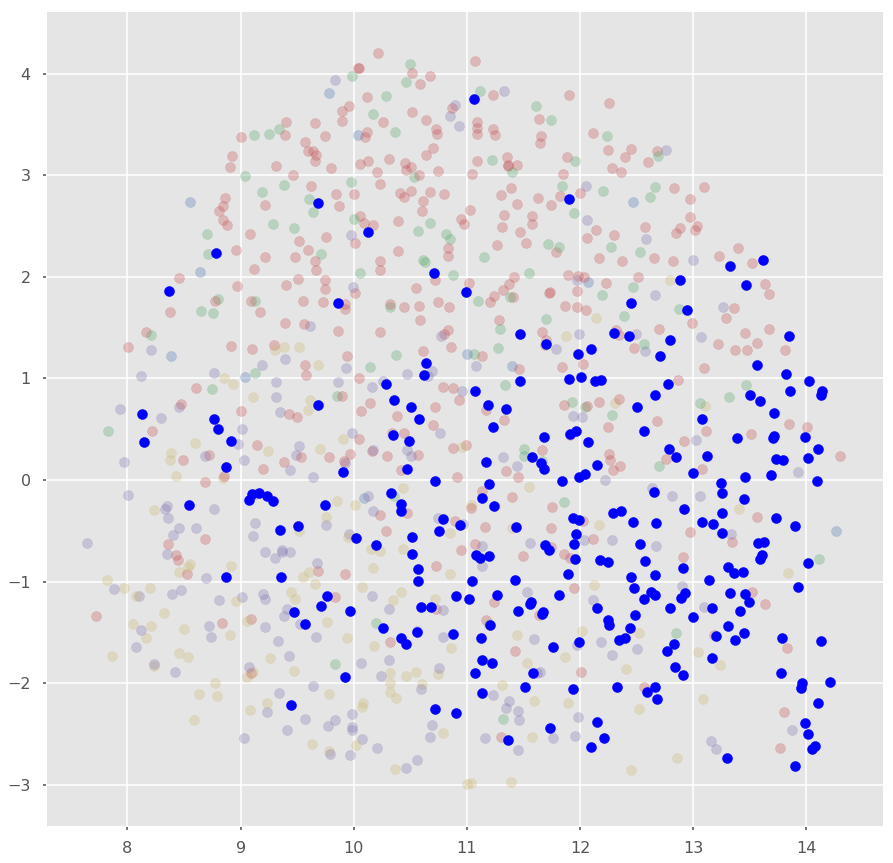

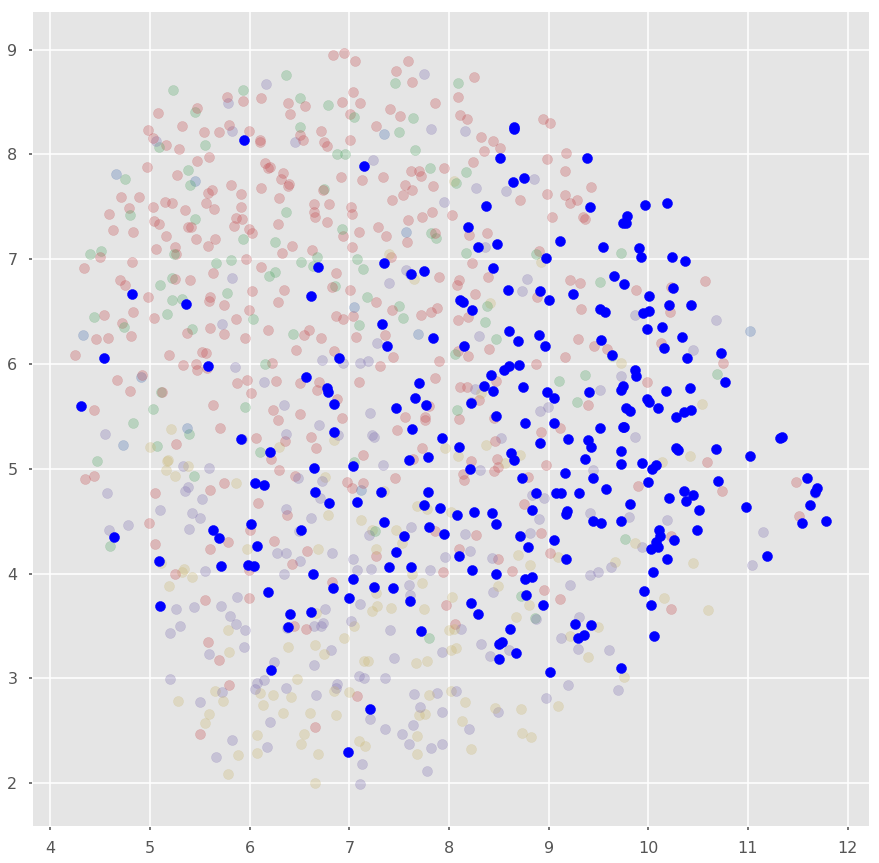

In [ ]:
for _ in range(3):
    umap_embeddings = UMAP(**params).fit_transform(encodings)

    xx = umap_embeddings[:, 0]
    yy = umap_embeddings[:, 1]

    for x, y, c in zip(xx[:-(num_of_friends+num_of_likes)], yy[:-(num_of_friends+num_of_likes)], attractiveness_colors_lis): 
        plt.scatter(x, y, color=c, alpha=0.3, s=100)
    for x, y,in zip(xx[-num_of_friends:], yy[-num_of_friends:]): 
        plt.scatter(x, y, color='b', s=100)

    plt.show()


In [ ]:
for x, y, c in zip(xx, yy, attractiveness_colors_lis): 
    if  c in {colors_pal[3], colors_pal[4]}: 
        plt.scatter(x, y, color=c, alpha=0.3)


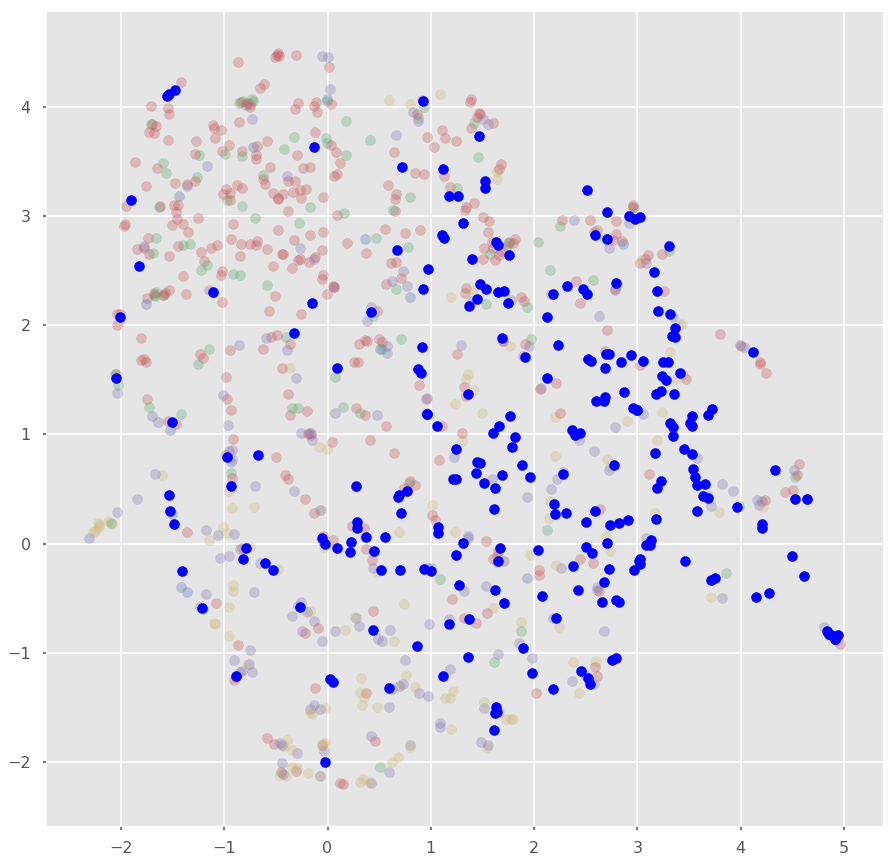

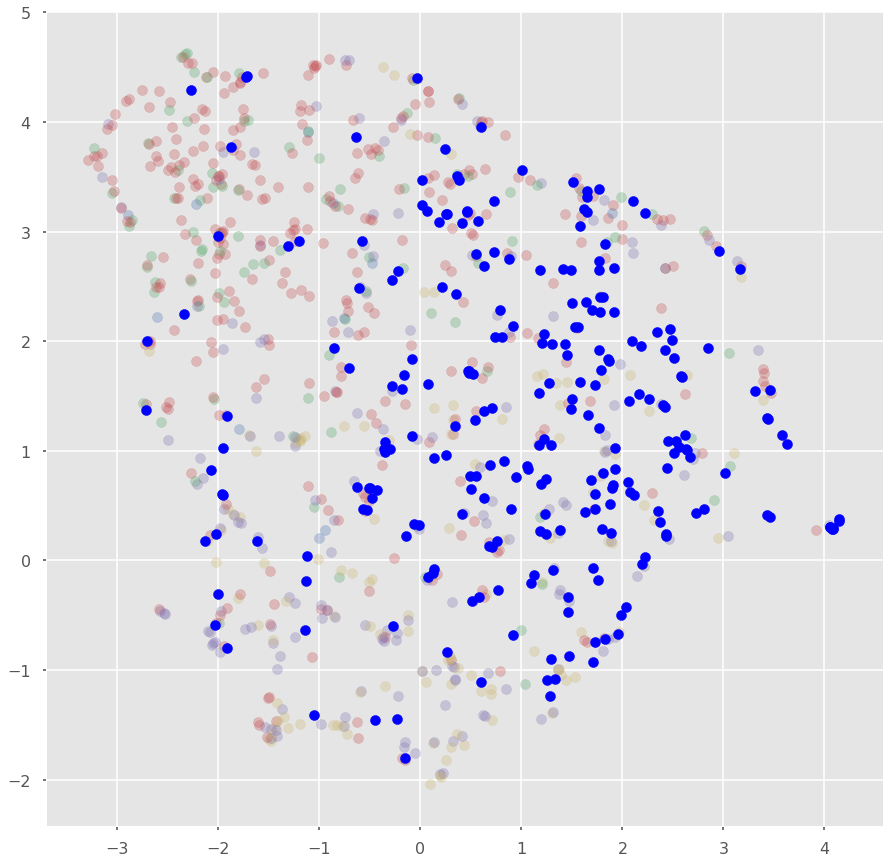

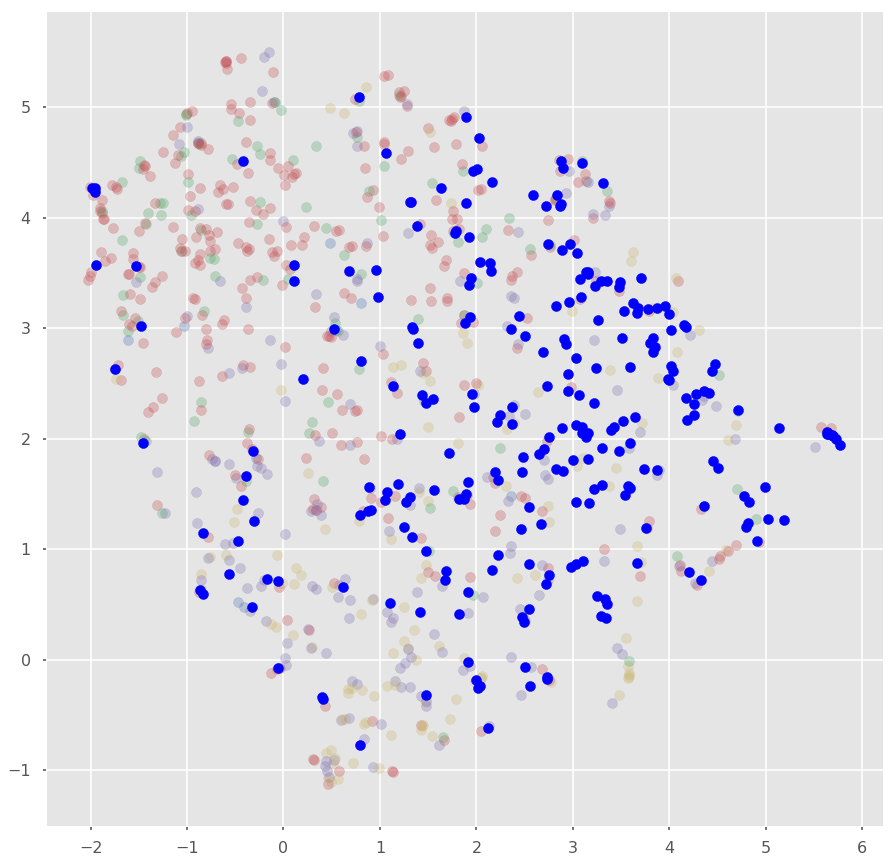

In [10]:
params = {
    #5 to 50, with a choice of 10 to 15 being a sensible default.
    "n_neighbors":5,

    #0.001 to 0.5, with 0.1 being a reasonable default.
    "min_dist":0.001,

    #metric: This determines the choice of metric used to measure distance in the input space. 
    "metric":'euclidean'
}

for _ in range(3):
    umap_embeddings = UMAP(**params).fit_transform(encodings)

    xx = umap_embeddings[:, 0]
    yy = umap_embeddings[:, 1]

    for x, y, c in zip(xx[:-(num_of_friends+num_of_likes)], yy[:-(num_of_friends+num_of_likes)], attractiveness_colors_lis): 
        plt.scatter(x, y, color=c, alpha=0.3, s=100)
    for x, y,in zip(xx[-num_of_friends:], yy[-num_of_friends:]): 
        plt.scatter(x, y, color='b', s=100)

    plt.show()


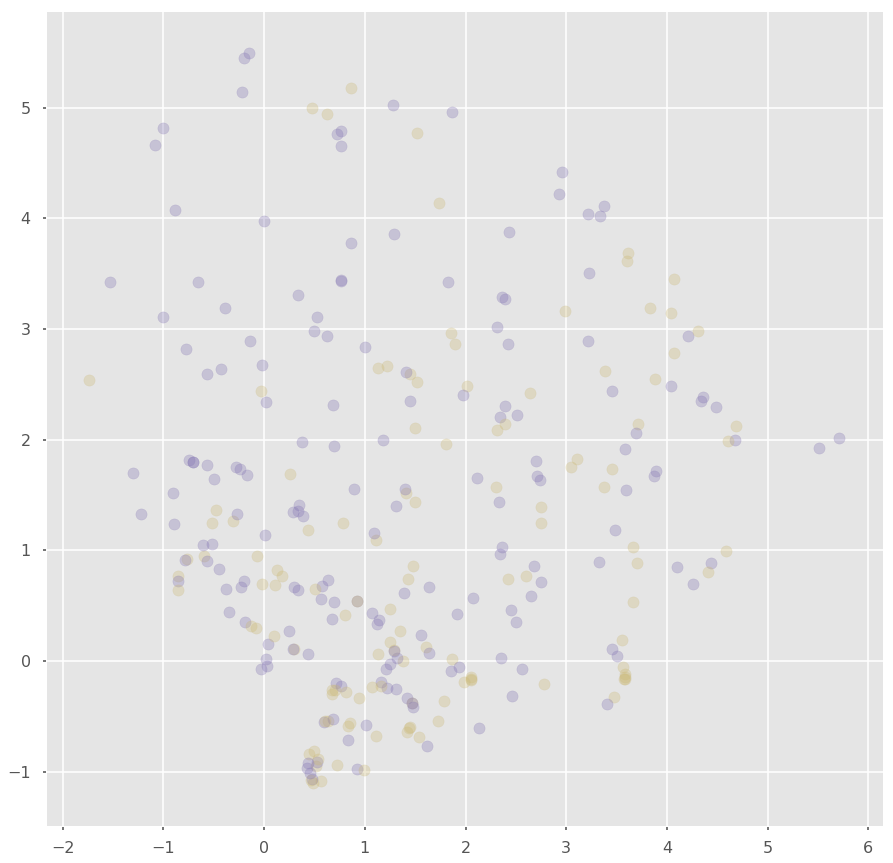

In [11]:
for x, y, c in zip(xx, yy, attractiveness_colors_lis): 
    if  c in {colors_pal[3], colors_pal[4]}: 
        plt.scatter(x, y, color=c, alpha=0.3)


In [9]:
plot_data = image_scatter_plot(
                tsne_scatter_plot=umap_embeddings, 
                images=X, 
                res=5000
            )

print(plot_data.shape)
im = Image.fromarray(np.uint8(plot_data))
im.show()

(5128, 5283, 3)


In [ ]:
lr_tinderlikes = pickle.load(open('lr_tinderlikes.pickle','wb'))